# Take two images. One should be your image. Second one should be an image of any historical place. 

# With the help of segmentation, create an output image in which foreground will be your image and background will be the historical image.

## This is using the Grab cut algo using mask

My Image :


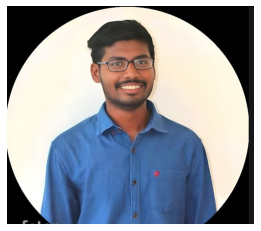


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 3 3 3]
 ...
 [0 0 0 ... 3 3 3]
 [0 0 0 ... 3 3 3]
 [0 0 0 ... 3 3 3]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
The background image taken by me:


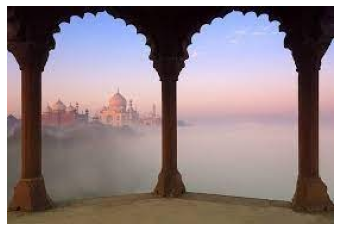


The final image with my photo and the background:


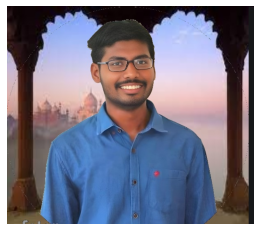

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def main():
    # Load your image
    my_img = cv2.imread('my.jpg')
    my_img_rgb = cv2.cvtColor(my_img, cv2.COLOR_BGR2RGB)
    print("My Image :")
    # Display the image using matplotlib
    plt.imshow(my_img_rgb)
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()
    print()
    width = int(my_img.shape[1] )
    height = int(my_img.shape[0] )
    dsize = (width, height)

    copy_of_my = my_img.copy()

    # Initialize the mask with zeros
    mask = np.zeros(my_img.shape[:2], np.uint8)

    
   
    # Create a mask condition based on the color range
    mask_condition = ((my_img[:, :, 0] >= 0) & (my_img[:, :, 0] <=255) &
                      (my_img[:, :, 1] >= 10) & (my_img[:, :, 1] <= 250)&
                     (my_img[:, :, 2] >= 0) & (my_img[:, :, 2] <= 255))

    # Set the mask condition to mark the foreground pixels
    mask[mask_condition] = cv2.GC_PR_FGD

    background_model = np.zeros((1, 65), np.float64)
    foreground_model = np.zeros((1, 65), np.float64)
    

    cv2.grabCut(my_img, mask,None, background_model, foreground_model, 100, cv2.GC_INIT_WITH_MASK)
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    no_bg_my = my_img * mask2[:, :, np.newaxis]

    cv2.imwrite('my_image_no_bg.jpeg', no_bg_my)
    

    # Adding a new Background
    background_img = cv2.imread('historic.jpeg')
    cv2.imwrite('background_image.jpeg', background_img)
    print("The background image taken by me:")
    background_img = cv2.imread('background_image.jpeg')
    background_img_rgb = cv2.cvtColor(background_img, cv2.COLOR_BGR2RGB)
    plt.imshow(background_img_rgb)
    plt.axis('off')
    plt.show()
    print()
    background_img = cv2.resize(background_img, dsize)
    background_img[mask2 != 0] = [0, 0, 0]

    final_img = no_bg_my + background_img
    cv2.imwrite('final_image.jpg', final_img)
    
    print("The final image with my photo and the background:")
    my_final_img = cv2.imread('final_image.jpg')
    my_final_img_rgb = cv2.cvtColor(my_final_img, cv2.COLOR_BGR2RGB)

    plt.imshow(my_final_img_rgb)
    plt.axis('off')  
    plt.show()
    


if __name__ == "__main__":
    main()


## This using the same algo with rectangle

In [31]:
# Importing Libraries
import cv2
import numpy as np
def main():
    

    my_img = cv2.imread('my.jpg')
    # Resizing the my image
    scale = 0.7
    width = int(my_img.shape[1]*scale)
    height = int(my_img.shape[0]*scale)
    dsize = (width, height)
    my_img = cv2.resize(my_img, dsize)



    # Selecting the Region of Interest of the image
    copy_of_my = my_img.copy()
    mask = np.zeros(my_img.shape[:2], np.uint8)

    background_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)

    x, y, w, h = cv2.selectROI("Select the Region of Interest", my_img)
    start = (x, y)
    end = (x+w, y+h)
    rect = (x, y, w, h)

    cv2.rectangle(copy_of_my, start, end, (0, 0, 255), 3)

    # Implementing GrabCut Algorithm for removing background

    cv2.grabCut(my_img, mask, rect, background_model, fgd_model, 100, cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    no_bg_my = my_img * mask2[:, :, np.newaxis]

    # Adding new Background
    background_img = cv2.imread('historic.jpeg')
    background_img = cv2.resize(background_img, dsize)
    background_img[mask2 != 0] = [0, 0, 0]

    final_img = no_bg_my + background_img
    cv2.imshow("Final Image", final_img)
    cv2.imwrite('final_image.jpeg', final_img)


    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    
if __name__ == "__main__":
    main()